Classification Dataset - Market Segmentation

In [38]:
# First, we import all relevant packages (this list can be updated when needed)
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
# Then, we read the csv file from our folder 'datasets' and print the first 10 lines, as well as the information.
mktsegmentation = pd.read_csv("datasets\market_segmentation.csv", delimiter=',')
pvmkt = mktsegmentation.head(10)
print('\n\nFirst 10 lines, Market Segmentation Set:\n\n',pvmkt,"\n\n")
print("\n\nInfo:",mktsegmentation.info()) #info displays as none but shows info above... :/




First 10 lines, Market Segmentation Set:

        ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0          

In [40]:
# Then, we print the mean of the initally 'data-driven' elements of the dataset - e.g. numerical values that are already numerical
mktnum = mktsegmentation[["Age","Family_Size"]]
print("\nMarket Segmentation Mean(s):\n",mktnum.mean(),"\nMarket Segmentation Standard Deviation(s):\n",mktnum.std())


Market Segmentation Mean(s):
 Age            43.466906
Family_Size     2.850123
dtype: float64 
Market Segmentation Standard Deviation(s):
 Age            16.711696
Family_Size     1.531413
dtype: float64


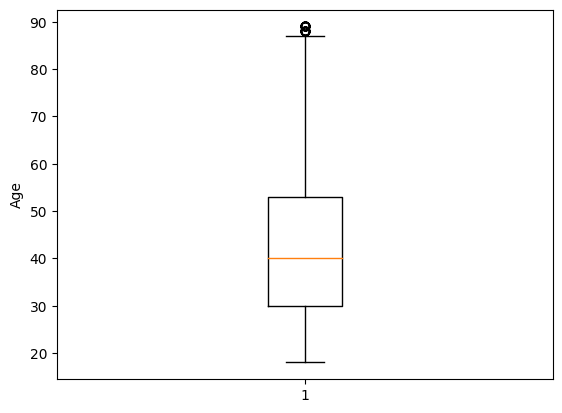

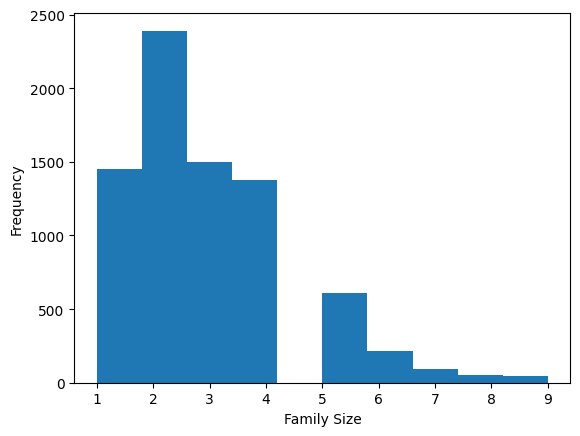

In [41]:
# Next, we make a box plot and a histogram (or whichever graphs are relevant) of those numerical values to showcase outliers and frequency.
market_boxplottable = mktsegmentation[["Age"]]
plt.boxplot(market_boxplottable)
plt.ylabel("Age")
plt.show()
plt.hist(mktnum["Family_Size"]) 
plt.xlabel("Family Size")
plt.ylabel("Frequency")
plt.show()

Now, we begin cleaning of the data. This involves dropping rows with blanks/NA values in them as well as cleaning the data in other ways, as showcased below.

In [42]:
# Dropping blanks, and getting info from the new dataset drop_blanks
drop_blanks = mktsegmentation.dropna()
drop_blanks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [43]:
# Using sklearn preprocessing to turn data that is not currently in numerical form (e.g. Graduated) to numerical form so we can use machine learning later.

from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()

drop_blanks_preprocessed = mktsegmentation.dropna() #new dataframe for preprocessed


#should gender be preprocessed??? probs
drop_blanks_preprocessed['Ever_Married'] = label_encoder.fit_transform(drop_blanks['Ever_Married'])
drop_blanks_preprocessed['Graduated'] = label_encoder.fit_transform(drop_blanks['Graduated'])
drop_blanks_preprocessed['Spending_Score'] = label_encoder.fit_transform(drop_blanks['Spending_Score'])             #needs inverting, high spending score =3, low =0
#drop_blanks_preprocessed['Spending_Score'] = label_encoder.inverse_transform(drop_blanks_preprocessed['Spending_Score'])
drop_blanks_preprocessed['Gender'] = label_encoder.fit_transform(drop_blanks['Gender'])
drop_blanks_preprocessed['Segmentation'] = label_encoder.fit_transform(drop_blanks['Segmentation'])
drop_blanks_preprocessed['Var_1'] = label_encoder.fit_transform(drop_blanks['Var_1'])


# ONE HOT ENCODING (good for professions)
profession_encoded = pd.get_dummies(drop_blanks['Profession'], prefix='Profession')
profession_encoded = profession_encoded.astype(int)

drop_blanks_preprocessed = pd.concat([drop_blanks_preprocessed, profession_encoded], axis=1)
drop_blanks_preprocessed.drop('Profession', axis=1, inplace=True)

print('---Preprocessed Data Set Head---')
drop_blanks_preprocessed.head(10) 
#print('---Original Data Set Head for Comparison---')
#drop_blanks.head(10)

#I'll be honest - for the messages below that aren't the dataframes, I don't know what's happening - but the dataframe conversions work. I'll look into it if there's time.


---Preprocessed Data Set Head---


C:\Users\skyso\AppData\Local\Temp\ipykernel_14472\2401381815.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_blanks_preprocessed['Ever_Married'] = label_encoder.fit_transform(drop_blanks['Ever_Married'])
C:\Users\skyso\AppData\Local\Temp\ipykernel_14472\2401381815.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_blanks_preprocessed['Graduated'] = label_encoder.fit_transform(drop_blanks['Graduated'])
C:\Users\skyso\AppData\Local\Temp\ipykernel_14472\2401381815.py:14: SettingWithCopyWarning

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,1,0,22,0,1.0,2,4.0,3,3,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,1.0,2,1.0,5,1,0,0,1,0,0,0,0,0,0
3,461735,1,1,67,1,0.0,1,2.0,5,1,0,0,0,0,0,0,0,1,0
5,461319,1,1,56,0,0.0,0,2.0,5,2,1,0,0,0,0,0,0,0,0
6,460156,1,0,32,1,1.0,2,3.0,5,2,0,0,0,0,0,1,0,0,0
7,464347,0,0,33,1,1.0,2,3.0,5,3,0,0,0,0,0,1,0,0,0
8,465015,0,1,61,1,0.0,2,3.0,6,3,0,0,1,0,0,0,0,0,0
9,465176,0,1,55,1,1.0,0,4.0,5,2,1,0,0,0,0,0,0,0,0
10,464041,0,0,26,1,1.0,2,3.0,5,0,0,0,1,0,0,0,0,0,0
11,464942,1,0,19,0,4.0,2,4.0,3,3,0,0,0,0,0,1,0,0,0


We now see that the columns that we've used preprocessing on are numerical - Ever_Married is a 1 or a 0 based on if the person has been married or not, and Segmentation, which was ranked on a letter based system before, is now numerical - with values between 0 and 3. There are areas of issue - for example, Spending_Score ranks higher based on how low the score is - e.g. a score of 2 correlates to a 'Low' score, but these issues actually wouldn't affect an ML algorithm that compares these variables as long as we keep them in mind. Another example (that may not be used) is 'Gender' - while it does play a role statistically, we have to make sure it's not biased - e.g. the algorithm is predisposed to 'True' values, which are currently Male (Male = 1, Female = 0). This shouldn't happen, but it's something to keep an eye out for in the training.

In [44]:
print('---Original Data Set Head for Comparison---')
drop_blanks.head(10)

---Original Data Set Head for Comparison---


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C
10,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A
11,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D


Correlated Variables:

In essence, what this next code block (however badly complicated it is) does is that it identifies a varible, and then highlights the variables 'pair' or the most correlated variable with that variable. You can also see the correlation values for all other variables in comparison. I've used the somewhat inefficient set_zero function to set the diagonal entries to 0 to run the highlighting, but note that all variables correlate to themselves with a correlation of 1. This allows us to see which variables might be useful in the future - for example, family size and spending is highly correlated with 'Segmentation' - a variable that isn't exactly clear, but we can use now. As you'd expect, variables like 'graduated' or 'ever_married' are correlated highly with 'Age'. While it is possible to use graphs to map these correlations in detail more (and something that will be done given time), for now, this dataframe provides a comprehensive picture of correlation. 



Note:
Keep in mind the 'flipped' variable 'Spending_Score' when looking at that data, too.


In [45]:
#numerical_data_only = drop_blanks_preprocessed.drop('Profession', axis=1)
correlation_set_classification = drop_blanks_preprocessed.corr(method='pearson', min_periods=1)
def set_zero(column):
    correlation_set_classification.loc[str(column),str(column)] = 0
set_zero("ID")
set_zero("Gender")
set_zero("Ever_Married")
set_zero("Age")
set_zero("Graduated")
set_zero("Work_Experience")
set_zero("Spending_Score")
set_zero("Family_Size")
set_zero("Var_1")
set_zero("Segmentation")
abs_correlation = correlation_set_classification.abs() # Absolute Values
correlation_set_classification.style.highlight_max(color = 'blue', axis = 0)

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
ID,0.000000,0.007943,0.033197,0.011664,-0.011744,-0.028948,-0.022125,0.006343,-0.007728,-0.013782,-0.019090,-0.005157,0.014949,0.004390,0.021269,0.001264,0.017542,-0.006205,-0.013512
Gender,0.007943,0.000000,0.114869,0.021269,-0.045263,-0.052294,-0.057802,0.058025,0.023131,0.033590,-0.046428,0.008909,-0.219165,0.137358,0.233025,0.030189,-0.123670,-0.036470,-0.038670
Ever_Married,0.033197,0.114869,0.000000,0.567729,0.202987,-0.092892,-0.632835,-0.083559,0.090855,-0.206909,0.177310,-0.084033,0.015790,0.016149,0.203215,-0.421563,-0.014425,0.200622,-0.099513
Age,0.011664,0.021269,0.567729,0.000000,0.247250,-0.188769,-0.277755,-0.281772,0.171659,-0.231696,0.119892,-0.119262,-0.034804,-0.017287,0.133837,-0.441194,-0.054111,0.541586,-0.076032
Graduated,-0.011744,-0.045263,0.202987,0.247250,0.000000,0.032257,-0.164737,-0.234985,0.127577,-0.172233,0.367099,-0.035552,-0.111697,-0.003579,-0.065980,-0.249805,-0.026476,0.007400,-0.097774
Work_Experience,-0.028948,-0.052294,-0.092892,-0.188769,0.032257,0.000000,0.052204,-0.069123,0.026172,0.006982,0.017820,-0.003784,0.000290,0.015254,-0.024093,-0.007009,0.181573,-0.117349,-0.008296
Spending_Score,-0.022125,-0.057802,-0.632835,-0.277755,-0.164737,0.052204,0.000000,-0.113809,-0.045211,0.084895,-0.205561,0.025632,-0.017504,-0.028929,-0.091850,0.282352,0.006208,0.015826,0.102840
Family_Size,0.006343,0.058025,-0.083559,-0.281772,-0.234985,-0.069123,-0.113809,0.000000,-0.142051,0.199412,-0.159135,0.004173,0.025264,-0.018821,0.103099,0.252690,-0.059818,-0.163836,0.027336
Var_1,-0.007728,0.023131,0.090855,0.171659,0.127577,0.026172,-0.045211,-0.142051,0.000000,-0.019768,0.090190,-0.022684,-0.067445,-0.031730,0.041406,-0.090001,-0.028779,0.101777,-0.035689
Segmentation,-0.013782,0.033590,-0.206909,-0.231696,-0.172233,0.006982,0.084895,0.199412,-0.019768,0.000000,-0.137655,-0.008625,-0.093229,-0.117926,-0.010167,0.367225,0.003346,-0.067182,0.090604


In [46]:
abs_correlation.style.highlight_max(color = 'blue', axis = 0)
# Gets max corr for absolute values (these could be negative or positive)

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
ID,0.000000,0.007943,0.033197,0.011664,0.011744,0.028948,0.022125,0.006343,0.007728,0.013782,0.019090,0.005157,0.014949,0.004390,0.021269,0.001264,0.017542,0.006205,0.013512
Gender,0.007943,0.000000,0.114869,0.021269,0.045263,0.052294,0.057802,0.058025,0.023131,0.033590,0.046428,0.008909,0.219165,0.137358,0.233025,0.030189,0.123670,0.036470,0.038670
Ever_Married,0.033197,0.114869,0.000000,0.567729,0.202987,0.092892,0.632835,0.083559,0.090855,0.206909,0.177310,0.084033,0.015790,0.016149,0.203215,0.421563,0.014425,0.200622,0.099513
Age,0.011664,0.021269,0.567729,0.000000,0.247250,0.188769,0.277755,0.281772,0.171659,0.231696,0.119892,0.119262,0.034804,0.017287,0.133837,0.441194,0.054111,0.541586,0.076032
Graduated,0.011744,0.045263,0.202987,0.247250,0.000000,0.032257,0.164737,0.234985,0.127577,0.172233,0.367099,0.035552,0.111697,0.003579,0.065980,0.249805,0.026476,0.007400,0.097774
Work_Experience,0.028948,0.052294,0.092892,0.188769,0.032257,0.000000,0.052204,0.069123,0.026172,0.006982,0.017820,0.003784,0.000290,0.015254,0.024093,0.007009,0.181573,0.117349,0.008296
Spending_Score,0.022125,0.057802,0.632835,0.277755,0.164737,0.052204,0.000000,0.113809,0.045211,0.084895,0.205561,0.025632,0.017504,0.028929,0.091850,0.282352,0.006208,0.015826,0.102840
Family_Size,0.006343,0.058025,0.083559,0.281772,0.234985,0.069123,0.113809,0.000000,0.142051,0.199412,0.159135,0.004173,0.025264,0.018821,0.103099,0.252690,0.059818,0.163836,0.027336
Var_1,0.007728,0.023131,0.090855,0.171659,0.127577,0.026172,0.045211,0.142051,0.000000,0.019768,0.090190,0.022684,0.067445,0.031730,0.041406,0.090001,0.028779,0.101777,0.035689
Segmentation,0.013782,0.033590,0.206909,0.231696,0.172233,0.006982,0.084895,0.199412,0.019768,0.000000,0.137655,0.008625,0.093229,0.117926,0.010167,0.367225,0.003346,0.067182,0.090604


In [47]:
# Minimum correlation variables - negative slope
correlation_set_classification.style.highlight_min(color = 'blue', axis = 0)

# While these are nice to know, they're not as needed as we might think, so I won't include them in the regression dataset - although I could

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
ID,0.000000,0.007943,0.033197,0.011664,-0.011744,-0.028948,-0.022125,0.006343,-0.007728,-0.013782,-0.019090,-0.005157,0.014949,0.004390,0.021269,0.001264,0.017542,-0.006205,-0.013512
Gender,0.007943,0.000000,0.114869,0.021269,-0.045263,-0.052294,-0.057802,0.058025,0.023131,0.033590,-0.046428,0.008909,-0.219165,0.137358,0.233025,0.030189,-0.123670,-0.036470,-0.038670
Ever_Married,0.033197,0.114869,0.000000,0.567729,0.202987,-0.092892,-0.632835,-0.083559,0.090855,-0.206909,0.177310,-0.084033,0.015790,0.016149,0.203215,-0.421563,-0.014425,0.200622,-0.099513
Age,0.011664,0.021269,0.567729,0.000000,0.247250,-0.188769,-0.277755,-0.281772,0.171659,-0.231696,0.119892,-0.119262,-0.034804,-0.017287,0.133837,-0.441194,-0.054111,0.541586,-0.076032
Graduated,-0.011744,-0.045263,0.202987,0.247250,0.000000,0.032257,-0.164737,-0.234985,0.127577,-0.172233,0.367099,-0.035552,-0.111697,-0.003579,-0.065980,-0.249805,-0.026476,0.007400,-0.097774
Work_Experience,-0.028948,-0.052294,-0.092892,-0.188769,0.032257,0.000000,0.052204,-0.069123,0.026172,0.006982,0.017820,-0.003784,0.000290,0.015254,-0.024093,-0.007009,0.181573,-0.117349,-0.008296
Spending_Score,-0.022125,-0.057802,-0.632835,-0.277755,-0.164737,0.052204,0.000000,-0.113809,-0.045211,0.084895,-0.205561,0.025632,-0.017504,-0.028929,-0.091850,0.282352,0.006208,0.015826,0.102840
Family_Size,0.006343,0.058025,-0.083559,-0.281772,-0.234985,-0.069123,-0.113809,0.000000,-0.142051,0.199412,-0.159135,0.004173,0.025264,-0.018821,0.103099,0.252690,-0.059818,-0.163836,0.027336
Var_1,-0.007728,0.023131,0.090855,0.171659,0.127577,0.026172,-0.045211,-0.142051,0.000000,-0.019768,0.090190,-0.022684,-0.067445,-0.031730,0.041406,-0.090001,-0.028779,0.101777,-0.035689
Segmentation,-0.013782,0.033590,-0.206909,-0.231696,-0.172233,0.006982,0.084895,0.199412,-0.019768,0.000000,-0.137655,-0.008625,-0.093229,-0.117926,-0.010167,0.367225,0.003346,-0.067182,0.090604


Summary:
In summary, we've dropped blanks and cleaned the dataset, then graphed the already numerical elements. We then preprocessed the set and identified all corrs between variables - the highest and the lowest (although the highest corrs are more relevant at the moment). Next, we'll export the final csv file to be trained into an algorithm. Ignorning the profession columns for now, which will be implemented later, in the model.

In [48]:
# And, to end it off (this will be marked as a comment, but the code was run to download the file)
#drop_blanks_preprocessed.to_csv("classification_final_toml.csv")

A note - for the highlighted variables in the correlation section, it appears that they may not be visible via github, but if you run these files on your local machine, you'll see something like the screenshots provided in the screenshots folder.